In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras 
from keras.models import Sequential
from keras.layers import *
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


# PREPROCESSING

In [3]:
train = pd.read_csv("emnist/train.csv", header=None)
test = pd.read_csv("emnist/test.csv", header = None)
print(train.shape, test.shape)

train = np.asarray(train)
test = np.asarray(test)

#Уменьшаем все индексы букв на 1, тк 0-ой элемент в выборке не существует 
for i in range(0, len(train)):
    train[i][0]-=1
    
for i in range(0, len(test)):
    test[i][0]-=1
    
    

alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 
          'n', 'o', 'p', 'q', 'r', 's', 't', 'u',
          'v', 'w', 'x', 'y', 'z'] #создаем алфавит для наглядности (полезно в последующих пунктах)
print(len(alphabet))

(65000, 785) (13000, 785)
26


In [4]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

Разбиваем выборку (train и test) на массив для прорисовки изображения (x_train, x_test), на (y_train, y_test) - значение индекса и y_train_labels, y_test_labels - сама буква

In [60]:
%%time

y_train = []
y_train_labels=[]
x_train = []
for i in range(0,len(train)):
    first_pic = train[i]
    y_train.append(first_pic[0])
    y_train_labels.append(alphabet[first_pic[0]])
    x_train.append(first_pic[1:])

x_test = []
y_test_labels = []
y_test = []
for i in range(0,len(test)):
    first_pic = test[i]
    y_test.append(first_pic[0])
    y_test_labels.append(alphabet[first_pic[0]])
    x_test.append(first_pic[1:])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

print(x_train[0].shape)
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# # for 4D
# x_train = x_train.reshape(65000,28,28, 1)
# x_test = x_test.reshape(13000, 28,28, 1)
print(x_train[0].shape)

(784,)
(784,)
CPU times: user 1.25 s, sys: 464 ms, total: 1.71 s
Wall time: 40.8 s


# №1

Для начала создадим модель (input_size = 28*28, output_size = 26) с 2 скрытыми слоями с количеством нейронов 1024 и 512 и функцией активации ReLU (выбор основан чисто на результатах модели в процессе написания)

In [6]:
%%time
O = 1024
S=512
P = 256
T = 26
batch_size = 300
learning_rate = 0.0001
training_epochs = 10

model = Sequential()
input_shape = (28, 28, 1)

model.add(Dense(O, activation='relu')) #1sй слой
#model.add(Dropout(rate=0.5))
model.add(Dense(S, activation = 'relu'))# 2ой скрытый слой
#model.add(Dropout(rate=0.3))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 20s 315us/step - loss: 0.8154 - acc: 0.7569
Epoch 2/10
65000/65000 [==============================] - 17s 264us/step - loss: 0.3776 - acc: 0.8804
Epoch 3/10
65000/65000 [==============================] - 16s 247us/step - loss: 0.2841 - acc: 0.9061
Epoch 4/10
65000/65000 [==============================] - 17s 254us/step - loss: 0.2248 - acc: 0.9233
Epoch 5/10
65000/65000 [==============================] - 16s 249us/step - loss: 0.1866 - acc: 0.9350
Epoch 6/10
65000/65000 [==============================] - 16s 249us/step - loss: 0.1556 - acc: 0.9444
Epoch 7/10
65000/65000 [==============================] - 16s 252us/step - loss: 0.1317 - acc: 0.9521
Epoch 8/10
65000/65000 [==============================] - 17s 261us/step - loss: 0.1157 - acc: 0.9572
Epoch 9/10
65000/65000 [==============================] - 17s 267us/step - loss: 0.1016 - acc: 0.9617
Epoch 10/10
13000/13000 [==============================] - 1s 91us/step
[0.3366237

Ради интереса добавим Dropout (результат немного лучше)

In [7]:
%%time
O = 1024
S=512
P = 256
T = 26
batch_size = 300
learning_rate = 0.0001
training_epochs = 10


# обучаем нейронку с 2 скрытыми слоями
model = Sequential()
input_shape = (28, 28, 1)

model.add(Dense(O, activation='relu')) #1sй слой
model.add(Dropout(rate=0.5))
model.add(Dense(S, activation = 'relu'))# 2ой скрытый слой
#model.add(Dropout(rate=0.3))
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

Epoch 1/10
65000/65000 [==============================] - 18s 281us/step - loss: 0.9825 - acc: 0.7083
Epoch 2/10
65000/65000 [==============================] - 16s 244us/step - loss: 0.5365 - acc: 0.8315
Epoch 3/10
65000/65000 [==============================] - 18s 276us/step - loss: 0.4318 - acc: 0.8619
Epoch 4/10
65000/65000 [==============================] - 19s 293us/step - loss: 0.3735 - acc: 0.8791
Epoch 5/10
65000/65000 [==============================] - 18s 280us/step - loss: 0.3372 - acc: 0.8886
Epoch 6/10
65000/65000 [==============================] - 17s 269us/step - loss: 0.3088 - acc: 0.8970
Epoch 7/10
65000/65000 [==============================] - 17s 260us/step - loss: 0.2834 - acc: 0.9042
Epoch 8/10
65000/65000 [==============================] - 17s 257us/step - loss: 0.2667 - acc: 0.9098
Epoch 9/10
65000/65000 [==============================] - 16s 251us/step - loss: 0.2494 - acc: 0.9136
Epoch 10/10
13000/13000 [==============================] - 1s 81us/step
[0.2765015

То же самое, но теперь добавим 3ий скрытый слой (256 нейронов).

In [8]:
%%time
O = 1024
S=512
P = 256
T = 26
batch_size = 300
learning_rate = 0.0001
training_epochs = 10


# обучаем нейронку с 2(3) скрытыми слоями
model = Sequential()
input_shape = (28, 28, 1)

model.add(Dense(O, activation='relu')) #1sй слой
model.add(Dropout(rate=0.5))
model.add(Dense(S, activation = 'relu'))# 2ой скрытый слой
model.add(Dense(P, activation = 'relu')) #3ий скрытый слой
#model.add(Dropout(rate=0.3)) #показывает результат хуже
model.add(Dense(T, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(x_train.shape)
print(y_train.shape)

model.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print(score)

(65000, 784)
(65000, 26)
Epoch 1/10
65000/65000 [==============================] - 21s 319us/step - loss: 0.9795 - acc: 0.7053
Epoch 2/10
65000/65000 [==============================] - 20s 313us/step - loss: 0.5196 - acc: 0.8362
Epoch 3/10
65000/65000 [==============================] - 19s 298us/step - loss: 0.4198 - acc: 0.8637
Epoch 4/10
65000/65000 [==============================] - 19s 296us/step - loss: 0.3681 - acc: 0.8802
Epoch 5/10
65000/65000 [==============================] - 20s 305us/step - loss: 0.3290 - acc: 0.8898
Epoch 6/10
65000/65000 [==============================] - 19s 290us/step - loss: 0.2977 - acc: 0.8996
Epoch 7/10
65000/65000 [==============================] - 20s 303us/step - loss: 0.2783 - acc: 0.9045
Epoch 8/10
65000/65000 [==============================] - 19s 295us/step - loss: 0.2612 - acc: 0.9101
Epoch 9/10
65000/65000 [==============================] - 20s 313us/step - loss: 0.2433 - acc: 0.9147
Epoch 10/10
13000/13000 [==============================] 

Как видно, результаты практически не отличаются друг от друга, но модель с 2умя скрытыми слоями работает чуточку быстрее.

# Нейронная сеть с использованием свертки

Попробуем обучить более сложную модель,используя свертку и maxpooling (были попытки подобрать другие значения аргументам, но закончилось не очень хорошо)

In [10]:
%%time

model = Sequential()
score=[0,0]
batch_size = 800
learning_rate = 0.0001

input_shape = (28, 28, 1)
model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     kernel_initializer='he_normal',
                     input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(26, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='adam',
                  metrics=['accuracy'])

i = 1
while(score[1]<0.95):  #да, читерство, но у меня хорошие одногруппники :)
    history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Epoch: ', i)
    print(score) 
    i=i+1


Epoch 1/1
65000/65000 [==============================] - 58s 887us/step - loss: 2.1880 - acc: 0.3477
Epoch:  1
[0.8309890206410334, 0.7428461538461538]
Epoch 1/1
65000/65000 [==============================] - 53s 814us/step - loss: 0.9254 - acc: 0.7031
Epoch:  2
[0.4625370959868798, 0.8526923076923076]
Epoch 1/1
65000/65000 [==============================] - 52s 806us/step - loss: 0.6326 - acc: 0.7948
Epoch:  3
[0.3281491979635679, 0.8926153846153846]
Epoch 1/1
65000/65000 [==============================] - 52s 799us/step - loss: 0.5149 - acc: 0.8328
Epoch:  4
[0.28004270859865044, 0.9086923076923077]
Epoch 1/1
65000/65000 [==============================] - 53s 811us/step - loss: 0.4484 - acc: 0.8539
Epoch:  5
[0.2564096028162883, 0.916]
Epoch 1/1
65000/65000 [==============================] - 52s 799us/step - loss: 0.4102 - acc: 0.8665
Epoch:  6
[0.24222617655075512, 0.9205384615384615]
Epoch 1/1
65000/65000 [==============================] - 51s 784us/step - loss: 0.3758 - acc: 0.876

65000/65000 [==============================] - 52s 793us/step - loss: 0.1660 - acc: 0.9405
Epoch:  55
[0.1531179929070461, 0.9475384615384616]
Epoch 1/1
65000/65000 [==============================] - 54s 824us/step - loss: 0.1651 - acc: 0.9400
Epoch:  56
[0.1539003495380569, 0.947]
Epoch 1/1
65000/65000 [==============================] - 51s 790us/step - loss: 0.1623 - acc: 0.9413
Epoch:  57
[0.1573763432221917, 0.9477692307692308]
Epoch 1/1
65000/65000 [==============================] - 53s 808us/step - loss: 0.1658 - acc: 0.9402
Epoch:  58
[0.15478071374875996, 0.9486153846153846]
Epoch 1/1
65000/65000 [==============================] - 54s 836us/step - loss: 0.1610 - acc: 0.9420
Epoch:  59
[0.15691681188258988, 0.944923076923077]
Epoch 1/1
65000/65000 [==============================] - 55s 842us/step - loss: 0.1615 - acc: 0.9422
Epoch:  60
[0.16150302287363089, 0.9435384615384615]
Epoch 1/1
65000/65000 [==============================] - 53s 821us/step - loss: 0.1625 - acc: 0.9420
Ep

# Тадам, 95%

# №2 (CONFUSION_MATRIX)

13000
Actual:  q
Predicted:  n


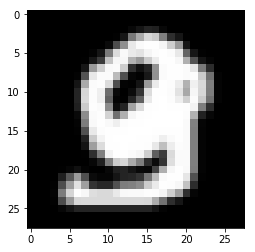

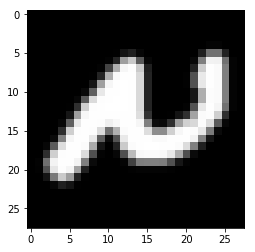

Actual:  q
Predicted:  n


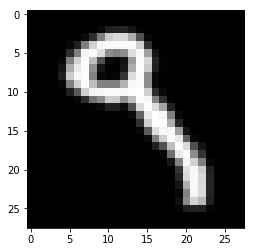

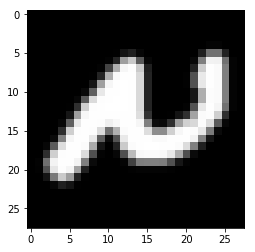

Actual:  l
Predicted:  s


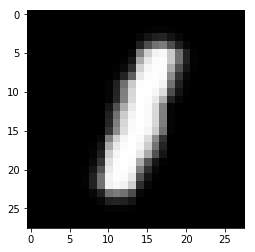

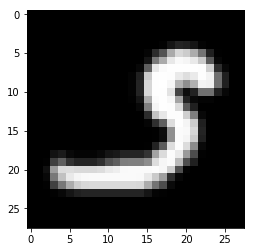

Actual:  i
Predicted:  w


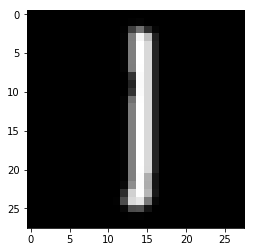

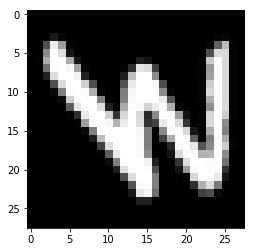

Actual:  i
Predicted:  w


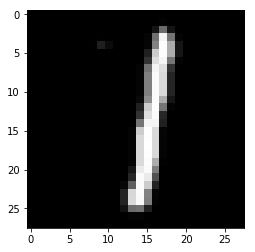

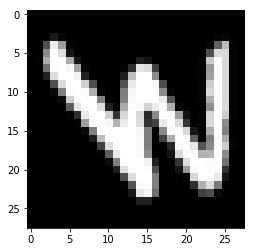

Actual:  i
Predicted:  w


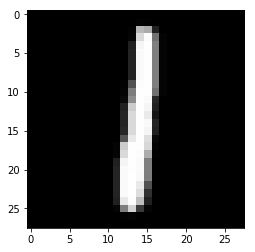

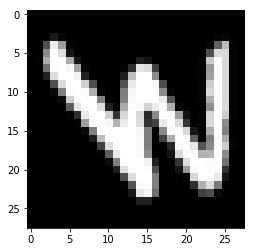

Actual:  w
Predicted:  v


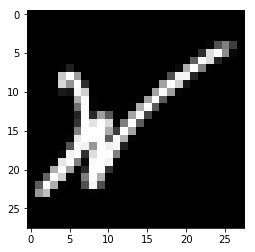

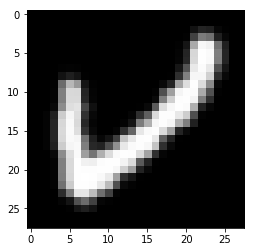

Actual:  l
Predicted:  s


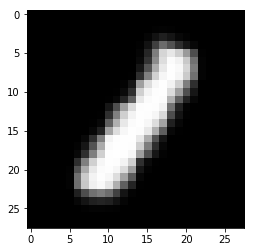

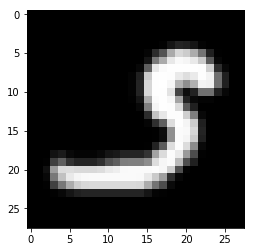

Actual:  j
Predicted:  b


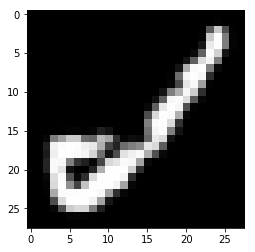

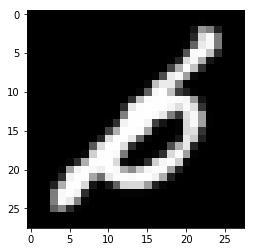

Actual:  j
Predicted:  s


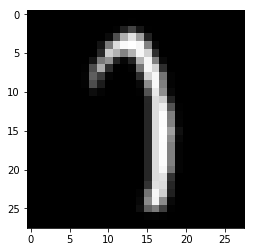

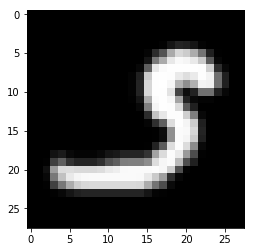

Actual:  q
Predicted:  d


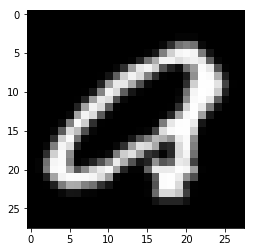

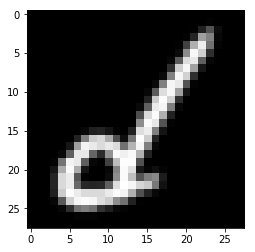

Actual:  d
Predicted:  w


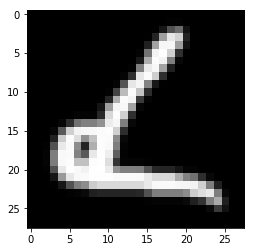

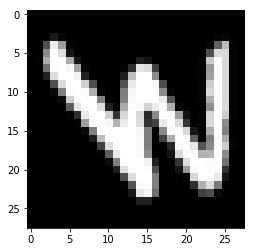

Actual:  v
Predicted:  q


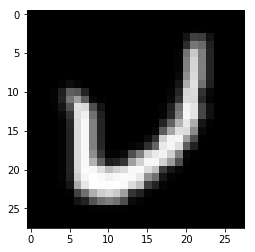

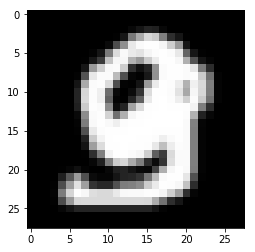

Actual:  u
Predicted:  j


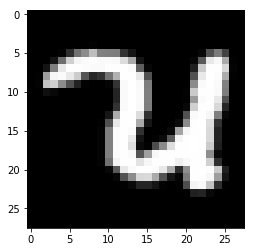

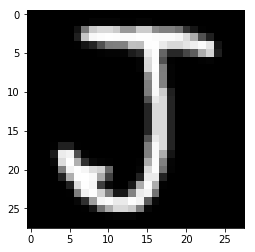

Actual:  l
Predicted:  s


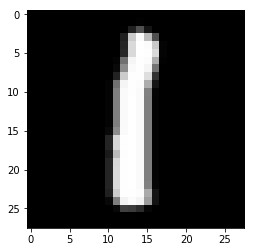

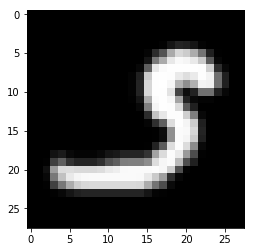

Actual:  a
Predicted:  n


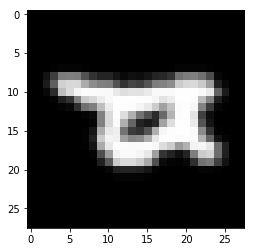

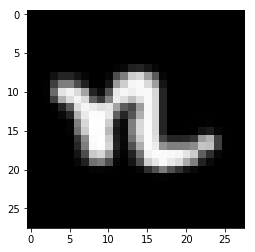

Actual:  l
Predicted:  s


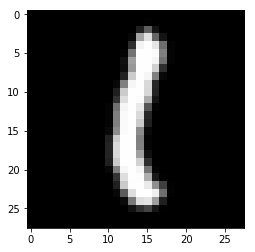

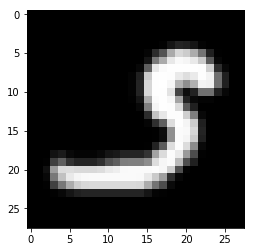

Actual:  x
Predicted:  r


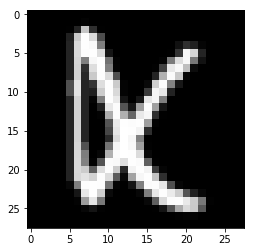

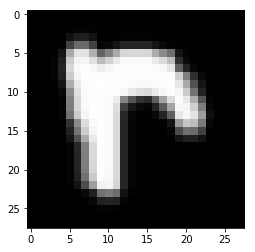

Actual:  f
Predicted:  m


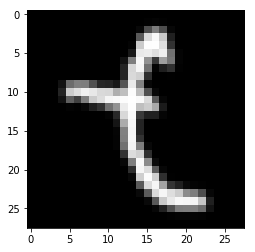

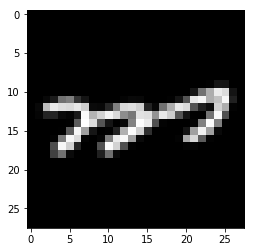

Actual:  g
Predicted:  r


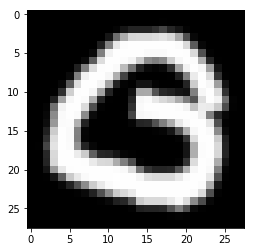

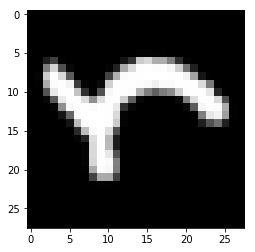

Actual:  g
Predicted:  e


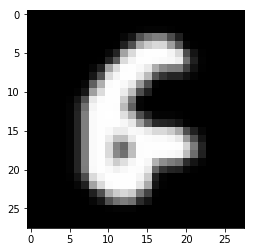

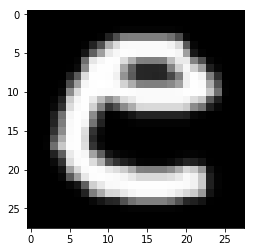

Actual:  h
Predicted:  w


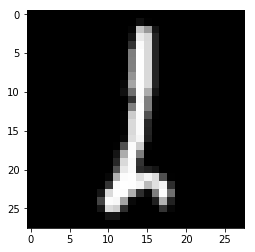

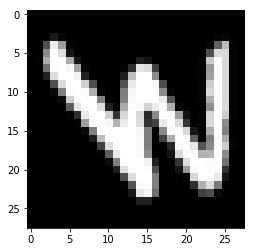

Actual:  i
Predicted:  w


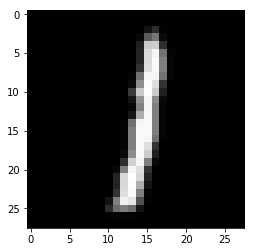

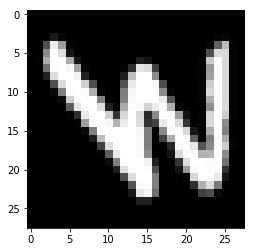

Actual:  l
Predicted:  s


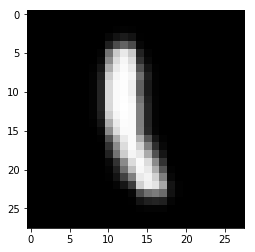

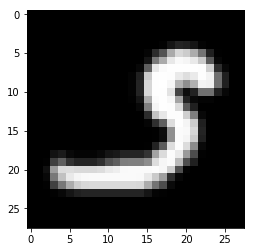

Actual:  g
Predicted:  d


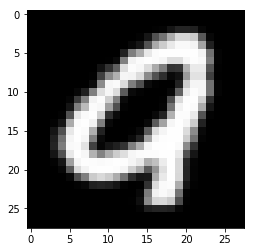

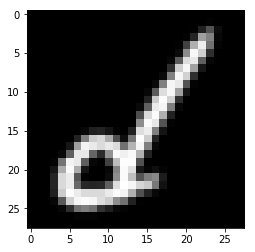

Actual:  g
Predicted:  r


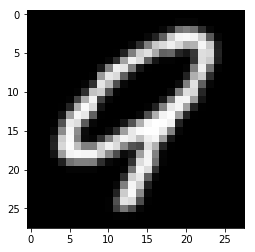

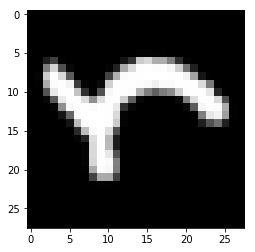

Actual:  d
Predicted:  g


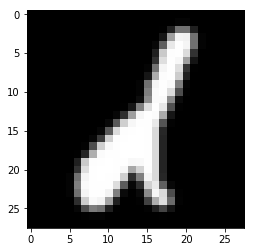

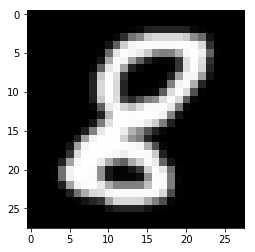

Actual:  p
Predicted:  r


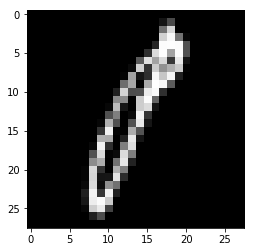

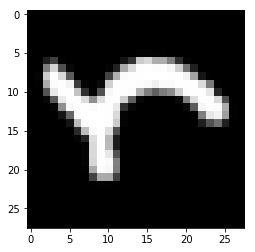

Actual:  y
Predicted:  v


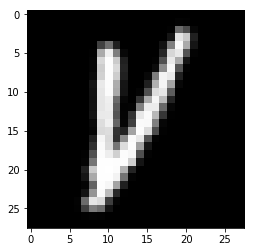

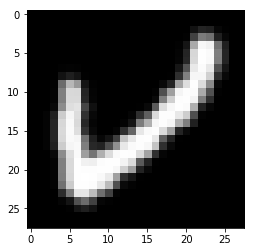

Actual:  l
Predicted:  s


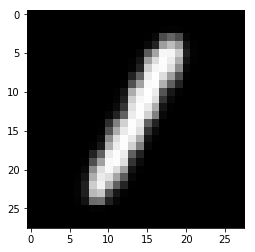

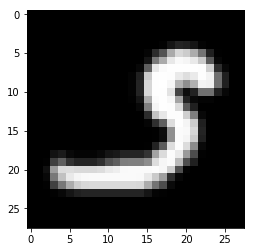

Actual:  l
Predicted:  s


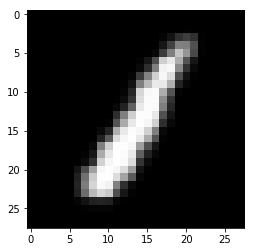

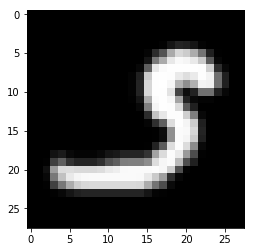

Actual:  l
Predicted:  s


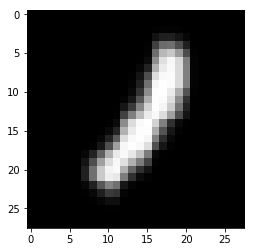

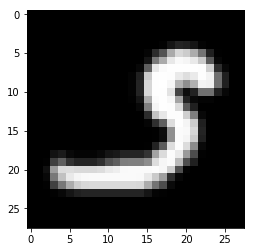

Actual:  j
Predicted:  v


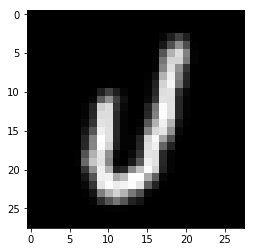

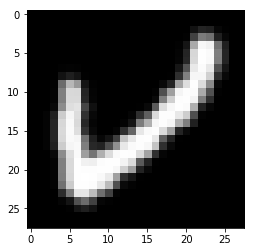

Actual:  i
Predicted:  w


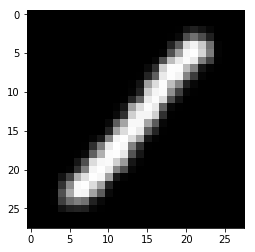

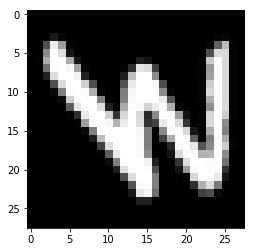

Actual:  q
Predicted:  e


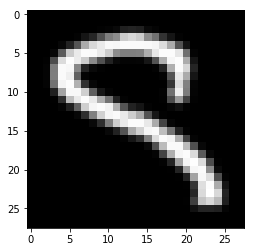

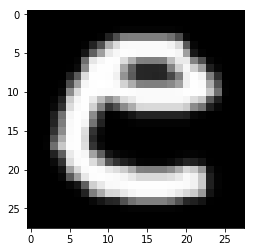

Actual:  q
Predicted:  n


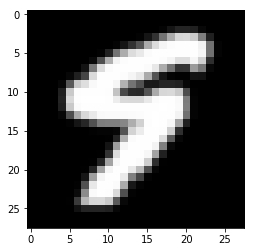

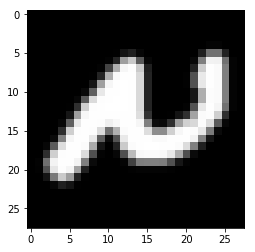

Actual:  j
Predicted:  s


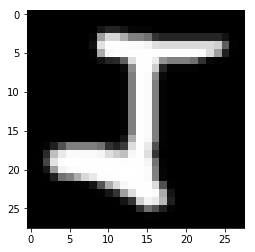

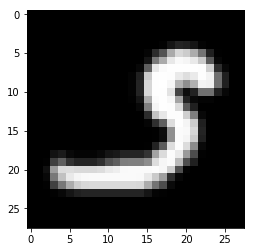

Actual:  i
Predicted:  w


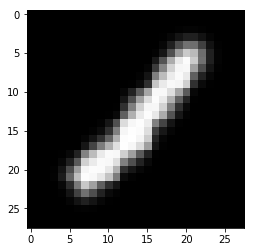

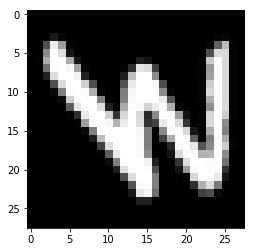

Actual:  g
Predicted:  r


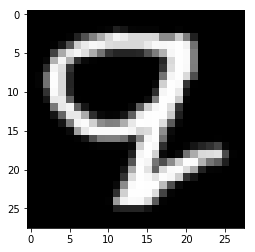

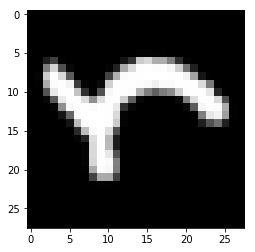

Actual:  g
Predicted:  r


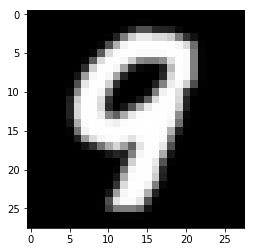

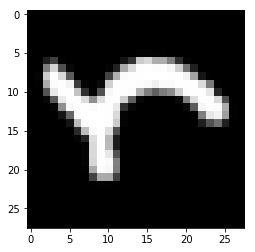

Actual:  g
Predicted:  x


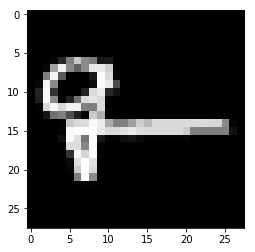

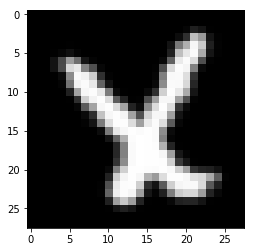

Actual:  c
Predicted:  z


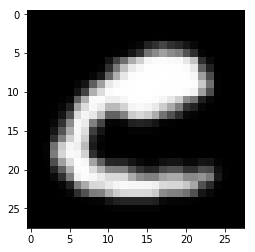

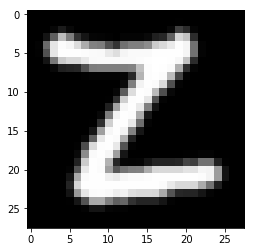

Actual:  g
Predicted:  p


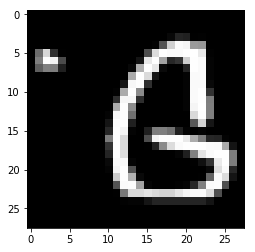

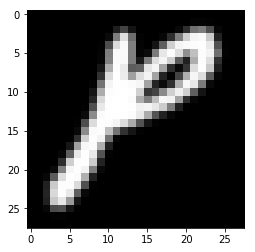

Actual:  g
Predicted:  r


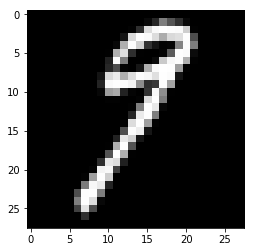

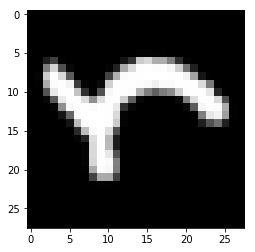

Actual:  i
Predicted:  w


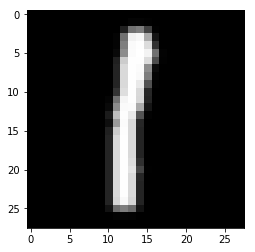

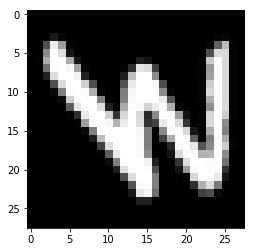

Actual:  u
Predicted:  v


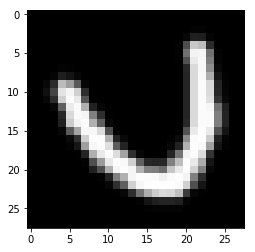

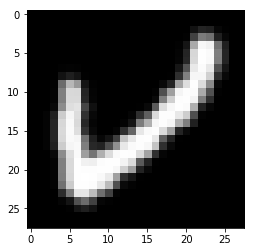

Actual:  l
Predicted:  s


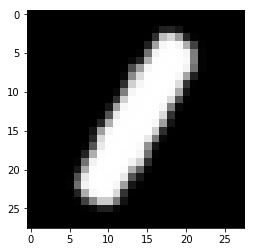

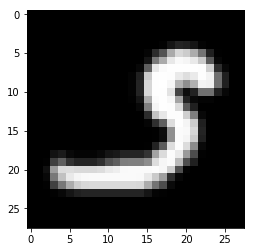

Actual:  b
Predicted:  x


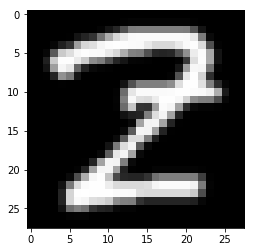

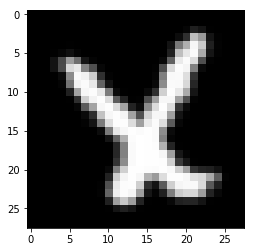

Actual:  t
Predicted:  x


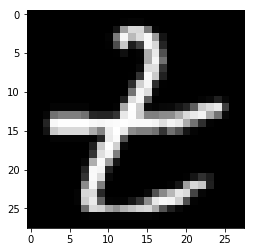

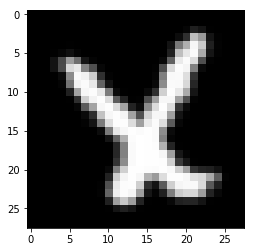

Actual:  l
Predicted:  s


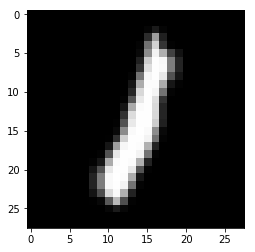

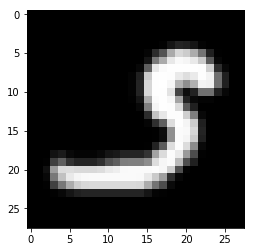

Actual:  l
Predicted:  s


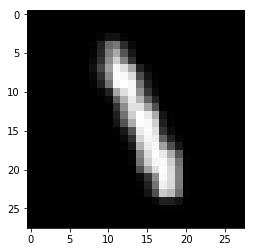

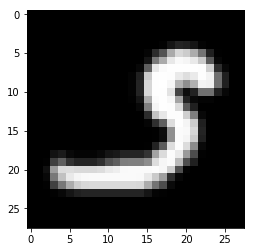

Actual:  q
Predicted:  n


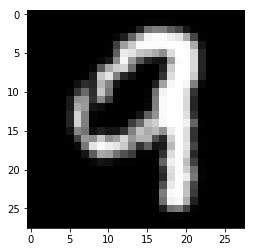

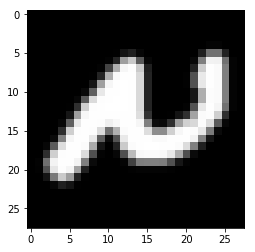

Actual:  k
Predicted:  j


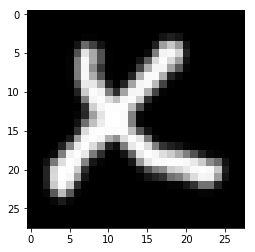

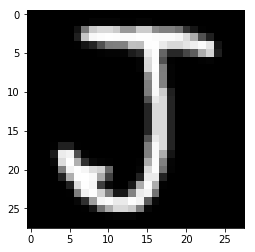

Actual:  h
Predicted:  n


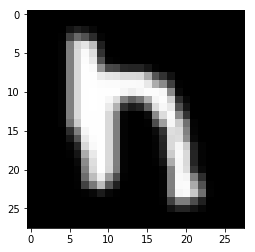

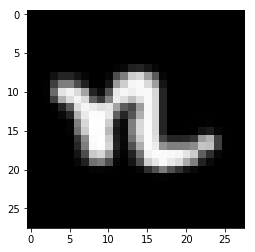

Actual:  v
Predicted:  f


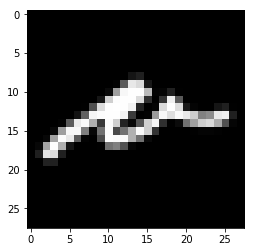

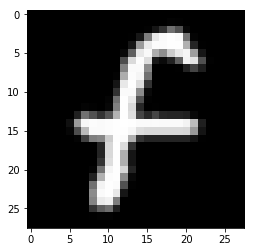

In [21]:
#просто подготавливаю данные еще раз, чтобы потом не перезапускать весь код сначала (логика та же)
y_test_check = []
y_test_check_labels =[]
x_test_check = []

for i in range(0,len(test)):
    first_pic = test[i]
    y_test_check.append(first_pic[0])    
    y_test_check_labels.append(alphabet[first_pic[0]])
    x_test_check.append(first_pic[1:])


#предсказываем значения
pred = model.predict_classes(x_test)

print(len(pred))
#выводим случаи неверного предсказания
for p in range(0, int(len(pred)/10)):
    if pred[p]!=y_test_check[p]:
        print("Actual: ", y_test_check_labels[p])
        print("Predicted: ", y_test_check_labels[pred[p]])
        plt.imshow(x_test_check[p].reshape((28, 28)).T, cmap='gray')
        plt.show()
        plt.imshow(x_test_check[pred[p]].reshape((28, 28)).T, cmap='gray')
        plt.show()
              


Выше представлены примеры букв, распознанных неверно.

Находим буквы, которые чаще всего путаются между собой.

In [52]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test_check, pred)
conf_mat_ratios = conf_mat

max_index = conf_mat.argmax(axis=1)
number = conf_mat.max(axis = 1)

fr_error= pd.DataFrame(columns = ['Letter', 'True', "False", "All", '%_of_true'])
letter = []
conf = []
fr_error['True']=number
for i in range(0, len(conf_mat[0])):
    letter = np.append(alphabet[25-i], letter)
    conf = np.append(alphabet[max_index[i]], conf)
   #print('Letter: ', alphabet[i], 'Conf: ', alphabet[max_index[i]], 'Number: ', number[i])
fr_error["All"] = np.sum(conf_mat, axis=1)
fr_error['False'] = fr_error["All"] - number
fr_error['%_of_true']=(fr_error['True'] / fr_error['All'])
fr_error['Letter']=letter

print(fr_error) 

   Letter  True  False  All  %_of_true
0       a   479     21  500      0.958
1       b   491      9  500      0.982
2       c   494      6  500      0.988
3       d   489     11  500      0.978
4       e   487     13  500      0.974
5       f   482     18  500      0.964
6       g   405     95  500      0.810
7       h   484     16  500      0.968
8       i   416     84  500      0.832
9       j   465     35  500      0.930
10      k   492      8  500      0.984
11      l   365    135  500      0.730
12      m   499      1  500      0.998
13      n   489     11  500      0.978
14      o   494      6  500      0.988
15      p   483     17  500      0.966
16      q   463     37  500      0.926
17      r   484     16  500      0.968
18      s   495      5  500      0.990
19      t   492      8  500      0.984
20      u   484     16  500      0.968
21      v   472     28  500      0.944
22      w   489     11  500      0.978
23      x   492      8  500      0.984
24      y   476     24  5

Отсортируем по точности:

самая узнаваемая буква - M

самая неузнаваемая буква - L (что, в принципе, логично, тк многие буквы содержат в себе признаки буквы L + L часто путается с I, J даже в реальности)

In [56]:
the_most_fr=fr_error.sort_values(['%_of_true'])
print('The percent of true: ')
print(the_most_fr)
print('MIN: ', min(the_most_fr['%_of_true']), ' MAX: ', max(the_most_fr['%_of_true']), 
     ' MEAN: ', np.mean(the_most_fr['%_of_true']))



The percent of true: 
   Letter  True  False  All  %_of_true
11      l   365    135  500      0.730
6       g   405     95  500      0.810
8       i   416     84  500      0.832
16      q   463     37  500      0.926
9       j   465     35  500      0.930
21      v   472     28  500      0.944
24      y   476     24  500      0.952
0       a   479     21  500      0.958
5       f   482     18  500      0.964
15      p   483     17  500      0.966
7       h   484     16  500      0.968
20      u   484     16  500      0.968
17      r   484     16  500      0.968
4       e   487     13  500      0.974
22      w   489     11  500      0.978
13      n   489     11  500      0.978
3       d   489     11  500      0.978
25      z   490     10  500      0.980
1       b   491      9  500      0.982
19      t   492      8  500      0.984
10      k   492      8  500      0.984
23      x   492      8  500      0.984
2       c   494      6  500      0.988
14      o   494      6  500      0.988
18 

Собственно, строим confusion_matrix:

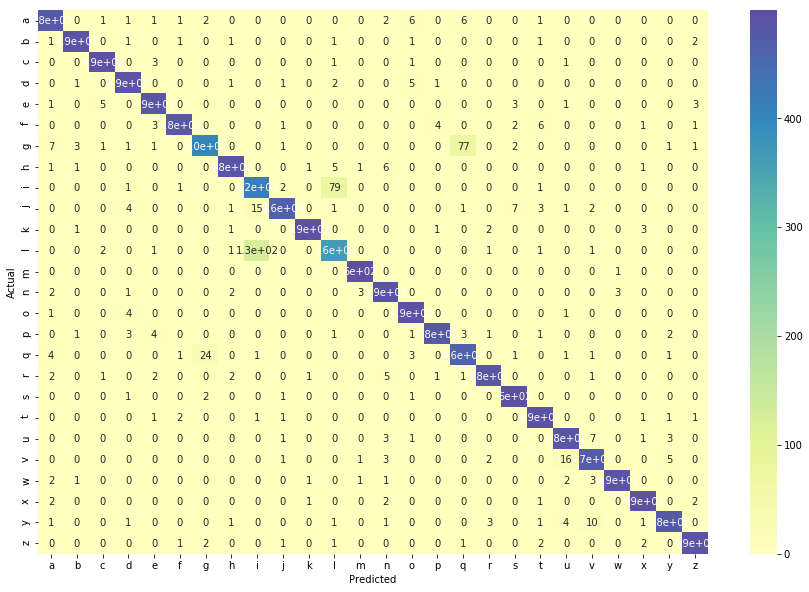

/home/vlada/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


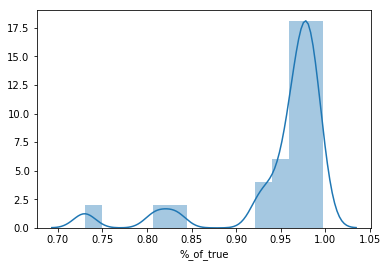

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
labels = alphabet
sns.heatmap(conf_mat, annot=True, center=0, xticklabels=labels, yticklabels=labels, cmap="Spectral")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

sns.distplot(fr_error['%_of_true'])
#plt.hist(x=fr_error['%_of_true'], bins=26)
plt.show()
#conf_mat_ratios = np.round(conf_mat / np.sum(conf_mat, axis=0),3)


Из него видно, что наиболее путающиеся между собой буквы:
1. i/l
2. g/q
3. u/v
4. j/i
5. v/y 

И, в принципе, оно и понятно, ведь все эти буквы +- похожи друг на друга и для человека тоже.

Касаемо же букв фамилий ни s, ни m практически не путаются.

In [58]:
savina = pd.DataFrame(fr_error.loc[25-alphabet.index('s')])
muchin = pd.DataFrame(fr_error.loc[25-alphabet.index('m')])

print(savina)
print(muchin)

               7
Letter         h
True         484
False         16
All          500
%_of_true  0.968
              13
Letter         n
True         489
False         11
All          500
%_of_true  0.978


# №3

# Обучаем нейронку без скрытых слоев:

In [64]:
O = 28*28
S=512
P = 256
T = 26
batch_size = 300
learning_rate = 0.0001
training_epochs = 10
print(y_train.shape)

NN = Sequential()
input_shape = (28, 28, 1)

#NN.add(Dense(O, activation='relu'))
NN.add(Dense(T, activation='softmax'))
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NN.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)


(65000, 26)
Epoch 1/10
65000/65000 [==============================] - 9s 135us/step - loss: 1.7389 - acc: 0.5423
Epoch 2/10
65000/65000 [==============================] - 2s 31us/step - loss: 1.2081 - acc: 0.6625
Epoch 3/10
65000/65000 [==============================] - 2s 31us/step - loss: 1.1222 - acc: 0.6849
Epoch 4/10
65000/65000 [==============================] - 2s 33us/step - loss: 1.0847 - acc: 0.6964
Epoch 5/10
65000/65000 [==============================] - 2s 31us/step - loss: 1.0630 - acc: 0.7025
Epoch 6/10
65000/65000 [==============================] - 2s 31us/step - loss: 1.0480 - acc: 0.7077
Epoch 7/10
65000/65000 [==============================] - 2s 33us/step - loss: 1.0366 - acc: 0.7101
Epoch 8/10
65000/65000 [==============================] - 2s 30us/step - loss: 1.0285 - acc: 0.7121
Epoch 9/10
65000/65000 [==============================] - 2s 31us/step - loss: 1.0215 - acc: 0.7159
Epoch 10/10
65000/65000 [==============================] - 2s 32us/step - loss: 1.0152 

Получаем следующие цветовые карты нейронов. Чем светлее цвет, тем больше этот пиксель имеет вес для опредленной буквы (больше вероятность белого цвета, чем черного). Например, для буквы $S$ и буквы $I$ цветовые карты довольно четко отображают значения весов, а вот для $D$ ситуация похуже, но тоже можно заметить нужные очертания.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 26)                20410     
Total params: 20,410
Trainable params: 20,410
Non-trainable params: 0
_________________________________________________________________
None
s


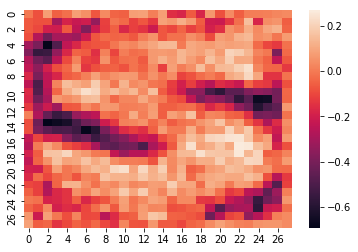

In [65]:
print(NN.summary())

weights = NN.layers[0].get_weights()[0]

let = 18
print(alphabet[let])
w_map=weights[:,let].reshape(28,28)

# np.putmask(w_map, w_map==w_map, w_map*10)
# np.putmask(w_map, w_map > 1, 1)

sns.heatmap(w_map.T)


i


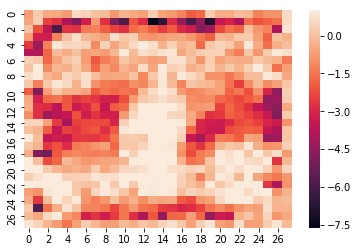

In [329]:
let = 8
print(alphabet[let])
w_map=weights[:,let].reshape(28,28)

np.putmask(w_map, w_map==w_map, w_map*10)
np.putmask(w_map, w_map > 1, 1)

sns.heatmap(w_map.T)


d


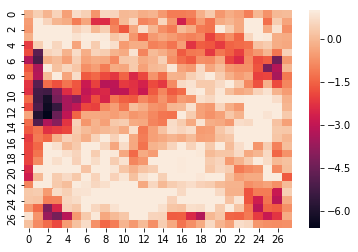

In [328]:
let = 3
print(alphabet[let])
w_map=weights[:,let].reshape(28,28)

np.putmask(w_map, w_map==w_map, w_map*10)
np.putmask(w_map, w_map > 1, 1)

sns.heatmap(w_map.T)


# Нейронка с одним скрытым слоем:

In [66]:
%%time
NN = Sequential()
input_shape = (28, 28, 1)

NN.add(Dense(28*28, activation='relu'))
NN.add(Dense(T, activation='softmax'))
NN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

NN.fit(x_train, y_train, epochs=training_epochs, batch_size=batch_size)

print(NN.summary())

Epoch 1/10
65000/65000 [==============================] - 10s 151us/step - loss: 1.0052 - acc: 0.7146
Epoch 2/10
65000/65000 [==============================] - 9s 132us/step - loss: 0.5226 - acc: 0.8467
Epoch 3/10
65000/65000 [==============================] - 8s 121us/step - loss: 0.3916 - acc: 0.8819
Epoch 4/10
65000/65000 [==============================] - 8s 125us/step - loss: 0.3233 - acc: 0.9005
Epoch 5/10
65000/65000 [==============================] - 9s 146us/step - loss: 0.2776 - acc: 0.9135
Epoch 6/10
65000/65000 [==============================] - 9s 135us/step - loss: 0.2474 - acc: 0.9226
Epoch 7/10
65000/65000 [==============================] - 8s 131us/step - loss: 0.2175 - acc: 0.9311
Epoch 8/10
65000/65000 [==============================] - 9s 144us/step - loss: 0.1973 - acc: 0.9360
Epoch 9/10
65000/65000 [==============================] - 10s 149us/step - loss: 0.1771 - acc: 0.9427
Epoch 10/10
65000/65000 [==============================] - 8s 115us/step - loss: 0.1608 -

# F
Для буквы f: судя по картам можно сказать, что особое значение имеют наличие светлых пикселей на горизонтальных параллельных прямых

(784, 26)
(28, 28, 784)
f


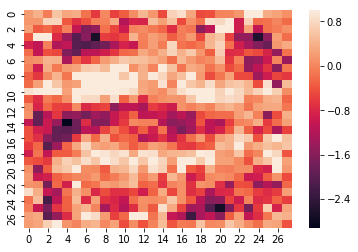

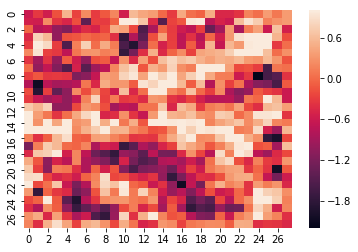

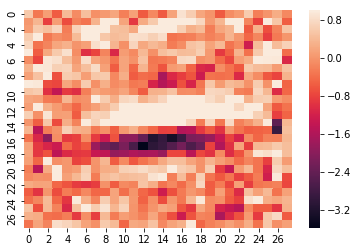

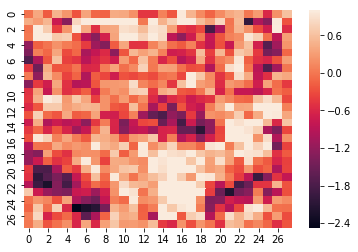

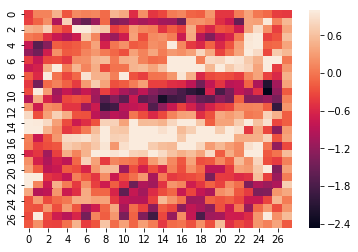

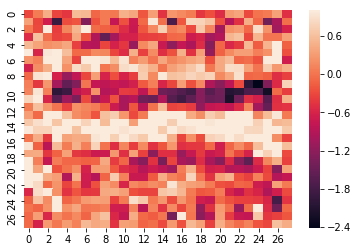

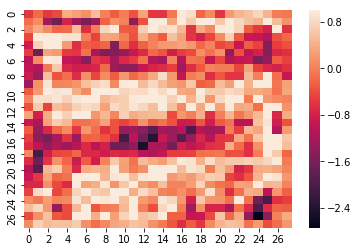

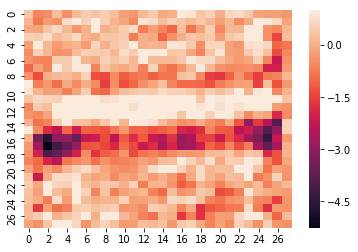

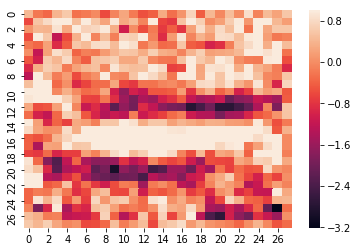

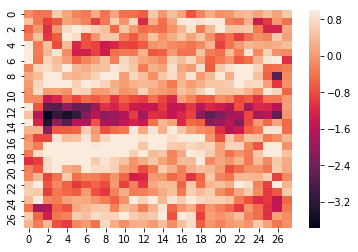

In [69]:
weights = NN.layers[1].get_weights()[0] #получаем веса для выходного слоя
print(weights.shape)

let = 5  #выбираем букву

weights=weights[:, let] #выбираем веса только для определенной буквы

weights_in=NN.layers[0].get_weights()[0] #получаем веса для скрытого слоя
weights_in = weights_in.reshape(28, 28, 784) #значение пикселя для нейрона

max_num = 10 #число наибольших весов

index_max = np.argpartition(weights, -max_num, axis=0)[-max_num:] #индексы для наибольших весов
print(weights_in.shape)

print(alphabet[let])

for i in index_max:
    w_map=weights_in[:, :, i] #выводим карту для нейронов с наибольшими весами

    np.putmask(w_map, w_map == w_map, w_map*10)
    np.putmask(w_map, w_map > 1, 1)

    plt.figure()
    sns.heatmap(w_map.T)




# S
Для буквы s: значение имеют округлые формы и наличие светлых пикселей полосками по противополжным углам (верхний левый - нижний правый, например)

(28, 28, 784)
s


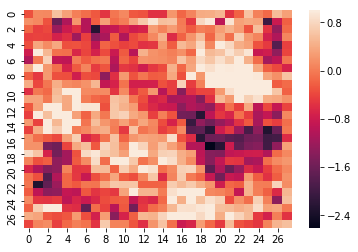

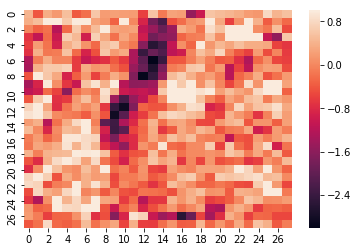

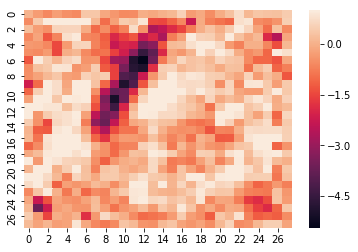

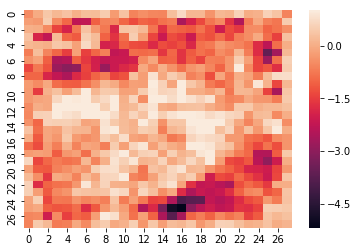

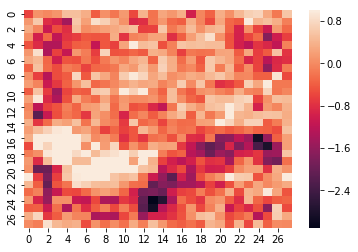

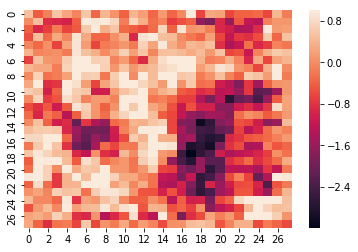

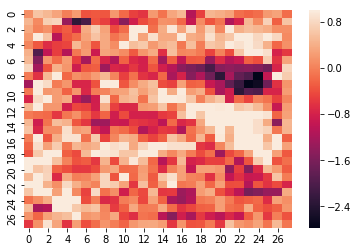

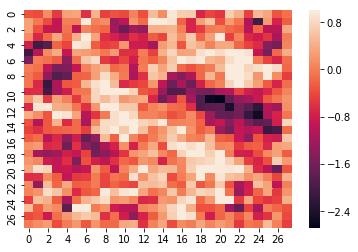

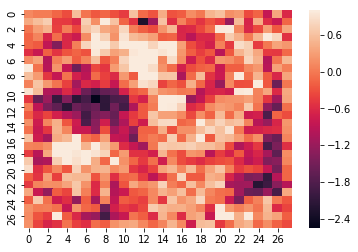

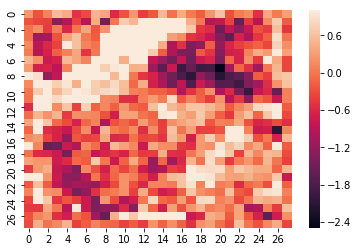

In [71]:
weights = NN.layers[1].get_weights()[0] #получаем веса для выходного слоя
let = 18  #выбираем букву

weights=weights[:, let] #выбираем веса только для определенной буквы

weights_in=NN.layers[0].get_weights()[0] #получаем веса для скрытого слоя
weights_in = weights_in.reshape(28, 28, 784) #значение пикселя для нейрона

max_num = 10 #число наибольших весов

index_max = np.argpartition(weights, -max_num, axis=0)[-max_num:] #индексы для наибольших весов
print(weights_in.shape)

print(alphabet[let])

for i in index_max:
    w_map=weights_in[:, :, i] #выводим карту для нейронов с наибольшими весами

    np.putmask(w_map, w_map == w_map, w_map*10)
    np.putmask(w_map, w_map > 1, 1)

    plt.figure()
    sns.heatmap(w_map.T)

# X
Для буквы x: значение имеют диагональные прямые как слева направо, так и наоборот, также они должны пересекаться (на некотрых катах это заметно)

(28, 28, 784)
x


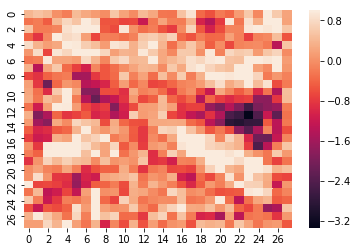

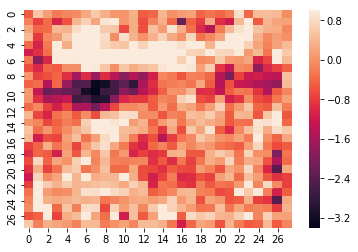

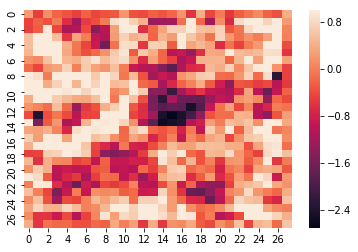

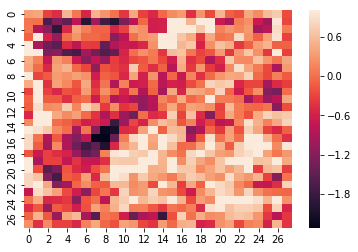

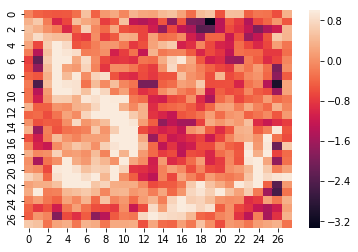

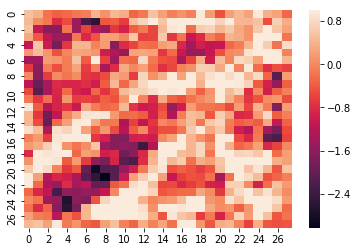

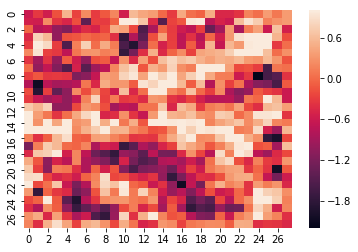

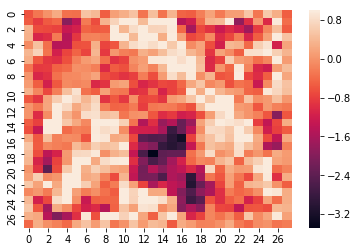

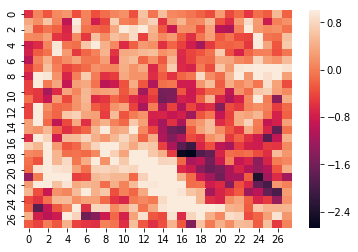

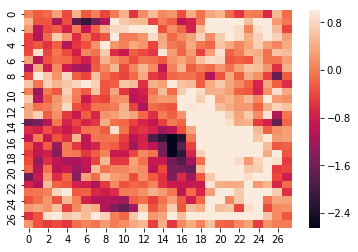

In [72]:
weights = NN.layers[1].get_weights()[0] #получаем веса для выходного слоя
let = 23  #выбираем букву

weights=weights[:, let] #выбираем веса только для определенной буквы

weights_in=NN.layers[0].get_weights()[0] #получаем веса для скрытого слоя
weights_in = weights_in.reshape(28, 28, 784) #значение пикселя для нейрона

max_num = 10 #число наибольших весов

index_max = np.argpartition(weights, -max_num, axis=0)[-max_num:] #индексы для наибольших весов
print(weights_in.shape)

print(alphabet[let])

for i in index_max:
    w_map=weights_in[:, :, i] #выводим карту для нейронов с наибольшими весами

    np.putmask(w_map, w_map == w_map, w_map*10)
    np.putmask(w_map, w_map > 1, 1)

    plt.figure()
    sns.heatmap(w_map.T)

# №5
Попытки классифицировать данные с помощью RF и SVM на моем ноуте не увенчались успехом (не хватило оперативки). 
Однако есть добрые люди в общаге с мощными (относительно) компьютерами.

Результат для леса (ок 7 Гб памяти):

    


# RANDOM FOREST

In [15]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

sKFold = StratifiedKFold(n_splits=5)

y_train_new = []
x_train_new = []
for i in range(0,len(train)):
    first_pic = train[i]
    y_train_new.append(first_pic[0])
    x_train_new.append(first_pic[1:])

x_test_new = []
y_test_new = []
for i in range(0,len(test)):
    first_pic = test[i]
    y_test_new.append(first_pic[0])
    x_test_new.append(first_pic[1:])

    
rfc = RandomForestClassifier(n_estimators=100, max_depth=10)
rfc.fit(x_train_new, y_train_new)
scores = cross_val_score(estimator=rfc, X=x_train_new, y=y_train_new, n_jobs=-1, scoring='f1_macro', cv=sKFold)
print(scores)
print(scores.mean())

/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.79892639 0.79898599 0.79731177 0.80176178 0.80165853]
0.7997288926280594
CPU times: user 54.5 s, sys: 2.8 s, total: 57.3 s
Wall time: 2min 20s


In [18]:
%%time
from sklearn.model_selection import RandomizedSearchCV

parameters = {'criterion': ['gini','entropy'], 
              'max_depth': [2, 5, 7, 10],
              'n_estimators':[50, 100, 150, 200]}

RandForestGS = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=sKFold, scoring='f1_macro', n_jobs=3, verbose=10)
RandForestGS.fit(x_train_new, y_train_new)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=150, max_depth=7, criterion=entropy ................
[CV] n_estimators=150, max_depth=7, criterion=entropy ................
[CV] n_estimators=150, max_depth=7, criterion=entropy ................
[CV]  n_estimators=150, max_depth=7, criterion=entropy, score=0.6792151806356584, total= 1.3min
[CV] n_estimators=150, max_depth=7, criterion=entropy ................
[CV]  n_estimators=150, max_depth=7, criterion=entropy, score=0.6735279951745051, total= 1.6min


[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed:  1.7min


[CV] n_estimators=150, max_depth=7, criterion=entropy ................
[CV]  n_estimators=150, max_depth=7, criterion=entropy, score=0.6728038470903444, total= 1.8min
[CV] n_estimators=100, max_depth=7, criterion=entropy ................
[CV]  n_estimators=100, max_depth=7, criterion=entropy, score=0.6756035277403487, total=  48.6s
[CV] n_estimators=100, max_depth=7, criterion=entropy ................
[CV]  n_estimators=150, max_depth=7, criterion=entropy, score=0.6805067958046644, total= 1.8min
[CV] n_estimators=100, max_depth=7, criterion=entropy ................
[CV]  n_estimators=150, max_depth=7, criterion=entropy, score=0.6853165880975247, total= 1.7min
[CV] n_estimators=100, max_depth=7, criterion=entropy ................
[CV]  n_estimators=100, max_depth=7, criterion=entropy, score=0.6766577758120715, total=  53.1s


[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed:  3.7min


[CV] n_estimators=100, max_depth=7, criterion=entropy ................
[CV]  n_estimators=100, max_depth=7, criterion=entropy, score=0.6803113144366955, total= 1.1min
[CV] n_estimators=200, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=7, criterion=entropy, score=0.6802173942249801, total= 1.2min
[CV] n_estimators=200, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=7, criterion=entropy, score=0.6811360155191134, total=  58.2s
[CV] n_estimators=200, max_depth=5, criterion=entropy ................
[CV]  n_estimators=200, max_depth=5, criterion=entropy, score=0.5425951887277461, total= 1.0min
[CV] n_estimators=200, max_depth=5, criterion=entropy ................
[CV]  n_estimators=200, max_depth=5, criterion=entropy, score=0.5420457573085692, total= 1.4min


[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  6.0min


[CV] n_estimators=200, max_depth=5, criterion=entropy ................
[CV]  n_estimators=200, max_depth=5, criterion=entropy, score=0.5416210747390463, total= 1.4min
[CV] n_estimators=50, max_depth=7, criterion=entropy .................
[CV]  n_estimators=50, max_depth=7, criterion=entropy, score=0.6676837138985886, total=  36.6s
[CV] n_estimators=50, max_depth=7, criterion=entropy .................
[CV]  n_estimators=200, max_depth=5, criterion=entropy, score=0.5482708819008405, total= 1.1min
[CV] n_estimators=50, max_depth=7, criterion=entropy .................
[CV]  n_estimators=200, max_depth=5, criterion=entropy, score=0.5480923060630899, total= 1.4min
[CV] n_estimators=50, max_depth=7, criterion=entropy .................
[CV]  n_estimators=50, max_depth=7, criterion=entropy, score=0.664649384895162, total=  36.0s
[CV] n_estimators=50, max_depth=7, criterion=entropy .................
[CV]  n_estimators=50, max_depth=7, criterion=entropy, score=0.6715352600822595, total=  28.6s
[C

[Parallel(n_jobs=3)]: Done  19 tasks      | elapsed:  8.0min


[CV] n_estimators=200, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=50, max_depth=7, criterion=entropy, score=0.6725682820487374, total=  35.0s
[CV] n_estimators=200, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=10, criterion=entropy, score=0.8041298801523029, total= 2.6min
[CV] n_estimators=200, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=10, criterion=entropy, score=0.7995649504402851, total= 3.7min
[CV] n_estimators=200, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=10, criterion=entropy, score=0.8026421317033415, total= 3.8min
[CV] n_estimators=100, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.535950603212458, total=  30.9s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.5404091614724618, total=  29.

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed: 13.7min


[CV] n_estimators=100, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.539842000043177, total=  33.0s
[CV] n_estimators=100, max_depth=5, criterion=entropy ................
[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.5482222855738363, total=  31.4s
[CV] n_estimators=100, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=100, max_depth=5, criterion=entropy, score=0.5480045437002534, total=  41.7s
[CV] n_estimators=100, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=200, max_depth=10, criterion=entropy, score=0.8039163688647419, total= 3.5min
[CV] n_estimators=100, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=100, max_depth=10, criterion=entropy, score=0.8006536415551337, total= 1.7min
[CV] n_estimators=100, max_depth=10, criterion=entropy ...............
[CV]  n_estimators=100, max_depth=10, criterion=entropy, score=0.7984573153297726, total= 1.8

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed: 17.9min


[CV] n_estimators=150, max_depth=5, criterion=gini ...................
[CV]  n_estimators=100, max_depth=10, criterion=entropy, score=0.800932564920762, total= 1.6min
[CV] n_estimators=150, max_depth=5, criterion=gini ...................
[CV]  n_estimators=150, max_depth=5, criterion=gini, score=0.5436741480561141, total=  38.5s
[CV] n_estimators=150, max_depth=5, criterion=gini ...................
[CV]  n_estimators=150, max_depth=5, criterion=gini, score=0.5522875525579519, total=  39.7s
[CV] n_estimators=150, max_depth=10, criterion=gini ..................
[CV]  n_estimators=150, max_depth=5, criterion=gini, score=0.5576905904189284, total=  44.6s
[CV] n_estimators=150, max_depth=10, criterion=gini ..................
[CV]  n_estimators=150, max_depth=5, criterion=gini, score=0.562007546246792, total=  42.2s
[CV] n_estimators=150, max_depth=10, criterion=gini ..................
[CV]  n_estimators=150, max_depth=10, criterion=gini, score=0.8041404944149473, total= 1.3min
[CV] n_estima

[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed: 21.3min


[CV] n_estimators=50, max_depth=5, criterion=entropy .................
[CV]  n_estimators=150, max_depth=10, criterion=gini, score=0.8048108109986944, total= 1.4min
[CV] n_estimators=50, max_depth=5, criterion=entropy .................
[CV]  n_estimators=150, max_depth=10, criterion=gini, score=0.8037424474746397, total= 1.1min
[CV] n_estimators=50, max_depth=5, criterion=entropy .................
[CV]  n_estimators=50, max_depth=5, criterion=entropy, score=0.5350004962834407, total=  21.9s
[CV] n_estimators=50, max_depth=5, criterion=entropy .................
[CV]  n_estimators=50, max_depth=5, criterion=entropy, score=0.5340331207930535, total=  21.8s
[CV]  n_estimators=50, max_depth=5, criterion=entropy, score=0.5380840809449923, total=  19.5s
[CV]  n_estimators=50, max_depth=5, criterion=entropy, score=0.548473740334159, total=  18.7s


[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed: 22.0min finished


Best params:
{'min_samples_split': 5, 'max_depth': 10, 'criterion': 'entropy'}
Best score:
0.7611520651352777
CPU times: user 5min 18s, sys: 23.2 s, total: 5min 41s
Wall time: 24min 51s


In [19]:
print('Best params:')
print(RandForestGS.best_params_)
print('Best score:')
print(RandForestGS.best_score_)

Best params:
{'n_estimators': 200, 'max_depth': 10, 'criterion': 'entropy'}
Best score:
0.8029073508416342


# SVM
Для svm использовать RandomizedSearch стало страшно, тк даже для фиксированных параметров
и небольшом количестве итераций считалось все довольно долго (примерно 1 час) и заняло около 9Гб памяти
Результат следующий:

In [32]:
%%time
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=10.0, max_iter=10000, verbose=False)
scores_svm = cross_val_score(estimator=svm, X=x_train_new, y=y_train_new, n_jobs=-1, scoring='f1_macro', cv=sKFold, verbose=False)
print(scores_svm)
print(scores_svm.mean())

/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/bin/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxSca

[0.64455255 0.64465167 0.64069683 0.64710374 0.65020909]
0.6454427748625955
CPU times: user 17.6 s, sys: 5.32 s, total: 22.9 s
Wall time: 52min 53s


In [ ]:
%%time

parameters = [{'C': [1, 10, 100, 1000],
               'kernel': ['rbf'], 
               'gamma': [0.05, 0.005]} ]
svmGS = RandomizedSearchCV(svm, parameters, scoring='f1_macro', n_jobs=-1, cv=sKFold, verbose=10)
svmGS.fit(trainX, trainY)

print('Best params:')
print(svmGS.best_params_)
print('Best score:')
print(svmGS.best_score_)

boosting'а просто боюсь.

Вывод: зачем юзать то, что работает долго, занимает много памяти и при этом показывает невысокий результат? Непонятно.

Нейронки работают гораздо эффективнее во всем отношениях

# №6

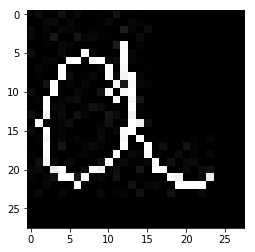

Predicted:  a


In [32]:
import PIL.Image as Img
import glob, os


file, ext = os.path.splitext('emnist/a.jpg')
im = Img.open('emnist/a.jpg')
im.thumbnail((28,28)) 

im.convert('1').save('a_bw.jpg','JPEG') #to white_black
x = plt.imread('a_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. #to normalize

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) #i tak ponyatno

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()

y=model.predict_classes(x)

print("Predicted: ", alphabet[y[0]])

RIGHT!

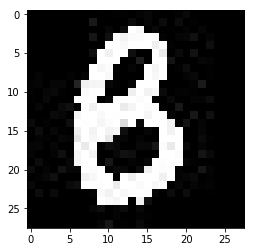

(1, 28, 28, 1)
Predicted:  b


In [33]:
file, ext = os.path.splitext('emnist/b.jpg')
im = Img.open('emnist/b.jpg')
im.thumbnail((28,28)) 

im.convert('1').save('b_bw.jpg','JPEG') 
x = plt.imread('b_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. 

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) 

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()
print(x.shape)

y=model.predict_classes(x)

print("Predicted: ", alphabet[y[0]])

RIGHT!

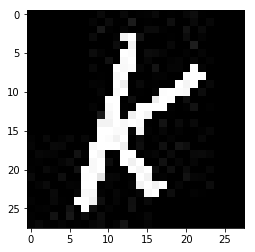

(1, 28, 28, 1)
Predicted:  k


In [34]:
file, ext = os.path.splitext('emnist/k.jpg')
im = Img.open('emnist/k.jpg')
im.thumbnail((28,28)) 

im.convert('1').save('k_bw.jpg','JPEG') 
x = plt.imread('k_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. 

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) 

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()
print(x.shape)

y=model.predict_classes(x)
print("Predicted: ", alphabet[y[0]])

RIGHT!

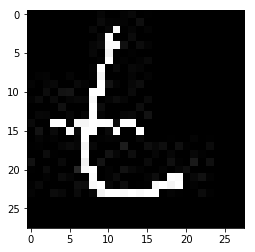

(1, 28, 28, 1)
Predicted:  t


In [35]:
file, ext = os.path.splitext('emnist/t.jpg')
im = Img.open('emnist/t.jpg')
im.thumbnail((28,28)) 

im.convert('1').save('t_bw.jpg','JPEG') 
x = plt.imread('t_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. 

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) 

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()
print(x.shape)

y=model.predict_classes(x)
print("Predicted: ", alphabet[y[0]])


RIGHT!

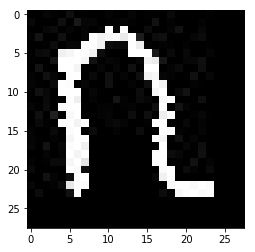

(1, 28, 28, 1)
Predicted:  r


In [36]:
file, ext = os.path.splitext('emnist/n.jpg')
im = Img.open('emnist/n.jpg')
im.thumbnail((28,28)) 

im.convert('1').save('n_bw.jpg','JPEG') 
x = plt.imread('n_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. 

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) 

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()
print(x.shape)

y=model.predict_classes(x)
print("Predicted: ", alphabet[y[0]])

WRONG! (ну и ладно, все равно хорошо работает :)

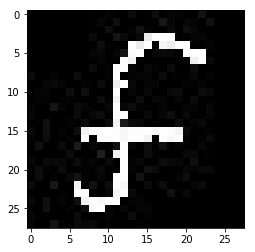

(1, 28, 28, 1)
Predicted:  f


In [63]:

im = Img.open('emnist/f.png')
im.thumbnail((28,28)) 

im.convert('1').save('f_bw.jpg','JPEG') 
x = plt.imread('f_bw.jpg') 
x = np.asarray(x) 
x = x.astype('float32') / 255. 

x = x.transpose() 
x = x.reshape((1, 28, 28, 1)) 

plt.imshow(x.reshape((28, 28)).transpose(), cmap='gray') 

plt.show()
print(x.shape)

y=model.predict_classes(x)
print("Predicted: ", alphabet[y[0]])

YES!

# Иван, спасибо! Очень клевая лаба :)